# RCT calculation
In this notebook we calculate the RCT for a specific part and also for a certain amount of parts (called as batch) and for different pictures as well

In [34]:
from dtwinpylib.dtwinpy.Digital_Twin import Digital_Twin

import importlib
import dtwinpylib
importlib.reload(dtwinpylib.dtwinpy.Digital_Twin) #reload this specifc module to upadte the class

<module 'dtwinpylib.dtwinpy.Digital_Twin' from 'c:\\Users\\pedro\\Github Repositories\\Digital_Twin\\Digital Twin\\dtwinpylib\\dtwinpy\\Digital_Twin.py'>

==========  Reading the Model: 5s_deterministic  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Queue Lenght: 3
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
--- Part already being processed: Part 4 ---
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2


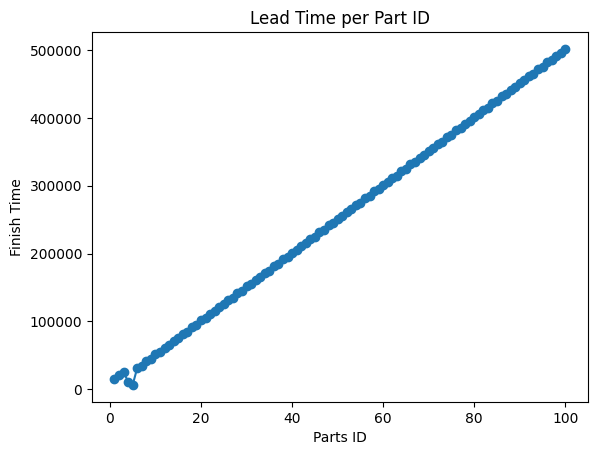

- Maximum Cycle Time: 26500
- Minimum Cycle Time: 6500
>>> Average system cycle time: 24545.0 [time unit]***


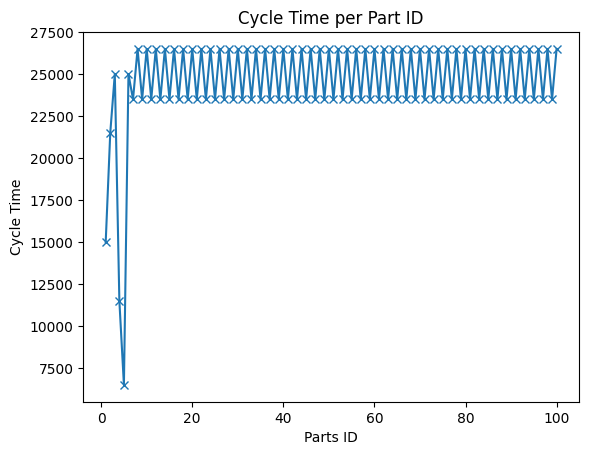

>>> System Throughput: 0.00019940179461615153 [parts / time unit] 


<Figure size 640x480 with 0 Axes>

In [35]:
mydt = Digital_Twin(name="5s_deterministic")


In [ ]:
mydt.run_digital_model(maxparts= 100)

##### Testing to run for a specific part id

In [11]:
mydt.run_digital_model(targeted_part_id= 1, plot= False)

==========  Reading the Model: 5s_deterministic  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Parts stored: Part 4
Part Processes for Trace Driven Simulation: None
Parts stored: Part 5
Part Processes for Trace Driven Simulation: None
Queue Lenght: 5
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 

##### RCT for a part in Queue 1

Part 1: To check just summ up the process time of each machine plus the conveyors transportation times

In [12]:
mydt.run_RCT_services(part_id= 1)

============ Running RCT Services ============
### ============ Simulation Started ============ ###
Time: 0 - [Machine 1] got Part 1 from Queue 1 (capacity= 4)
Time: 5000 - [Conveyor towards Queue 2] GOT Part 1
Time: 5000 - [Machine 1] got Part 2 from Queue 1 (capacity= 3)
Time: 5200 - [Conveyor towards Queue 2] PUT Part 1 in the Queue 2
Time: 5201 - [Machine 2] got Part 1 from Queue 2 (capacity= 0)
Time: 10000 - [Conveyor towards Queue 3] GOT Part 2
Time: 10000 - [Machine 1] got Part 3 from Queue 1 (capacity= 2)
Time: 10200 - [Conveyor towards Queue 3] PUT Part 2 in the Queue 3
Time: 10201 - [Conveyor towards Queue 4] GOT Part 1
Time: 10201 - [Machine 3] got Part 2 from Queue 3 (capacity= 0)
Time: 10301 - [Conveyor towards Queue 4] PUT Part 1 in the Queue 4
Time: 10302 - [Machine 4] got Part 1 from Queue 4 (capacity= 0)
Time: 13302 - [Conveyor towards Queue 5] GOT Part 1
Time: 13402 - [Conveyor towards Queue 5] PUT Part 1 in the Queue 5
Time: 13403 - [Machine 5] got Part 1 from Queue 

Part 2: the RCT of part 1 plus the time that part 2 was waiting in the first machine most problabily. But this part didn't use the machine with 5000, but rather the one with 3500. So subtract that time for (5000 - 3500 = - 1500)

In [13]:
mydt.run_RCT_services(part_id= 2)

============ Running RCT Services ============
### ============ Simulation Started ============ ###
Time: 0 - [Machine 1] got Part 1 from Queue 1 (capacity= 4)
Time: 5000 - [Conveyor towards Queue 2] GOT Part 1
Time: 5000 - [Machine 1] got Part 2 from Queue 1 (capacity= 3)
Time: 5200 - [Conveyor towards Queue 2] PUT Part 1 in the Queue 2
Time: 5201 - [Machine 2] got Part 1 from Queue 2 (capacity= 0)
Time: 10000 - [Conveyor towards Queue 3] GOT Part 2
Time: 10000 - [Machine 1] got Part 3 from Queue 1 (capacity= 2)
Time: 10200 - [Conveyor towards Queue 3] PUT Part 2 in the Queue 3
Time: 10201 - [Conveyor towards Queue 4] GOT Part 1
Time: 10201 - [Machine 3] got Part 2 from Queue 3 (capacity= 0)
Time: 10301 - [Conveyor towards Queue 4] PUT Part 1 in the Queue 4
Time: 10302 - [Machine 4] got Part 1 from Queue 4 (capacity= 0)
Time: 13302 - [Conveyor towards Queue 5] GOT Part 1
Time: 13402 - [Conveyor towards Queue 5] PUT Part 1 in the Queue 5
Time: 13403 - [Machine 5] got Part 1 from Queue 

Testing for bechs of 2 parts (should be the same as the RCT of the part 2)

In [19]:
mydt.run_RCT_services(batch=2)

============ Running RCT Services ============
### ============ Simulation Started ============ ###
Time: 0 - [Machine 1] got Part 1 from Queue 1 (capacity= 4)
Time: 5000 - [Conveyor towards Queue 2] GOT Part 1
Time: 5000 - [Machine 1] got Part 2 from Queue 1 (capacity= 3)
Time: 5200 - [Conveyor towards Queue 2] PUT Part 1 in the Queue 2
Time: 5201 - [Machine 2] got Part 1 from Queue 2 (capacity= 0)
Time: 10000 - [Conveyor towards Queue 3] GOT Part 2
Time: 10000 - [Machine 1] got Part 3 from Queue 1 (capacity= 2)
Time: 10200 - [Conveyor towards Queue 3] PUT Part 2 in the Queue 3
Time: 10201 - [Conveyor towards Queue 4] GOT Part 1
Time: 10201 - [Machine 3] got Part 2 from Queue 3 (capacity= 0)
Time: 10301 - [Conveyor towards Queue 4] PUT Part 1 in the Queue 4
Time: 10302 - [Machine 4] got Part 1 from Queue 4 (capacity= 0)
Time: 13302 - [Conveyor towards Queue 5] GOT Part 1
Time: 13402 - [Conveyor towards Queue 5] PUT Part 1 in the Queue 5
Time: 13403 - [Machine 5] got Part 1 from Queue 

##### Testing after Sync

==========  Reading the Model: 5s_deterministic  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Queue Lenght: 3
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
--- Part already being processed: Part 4 ---
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2


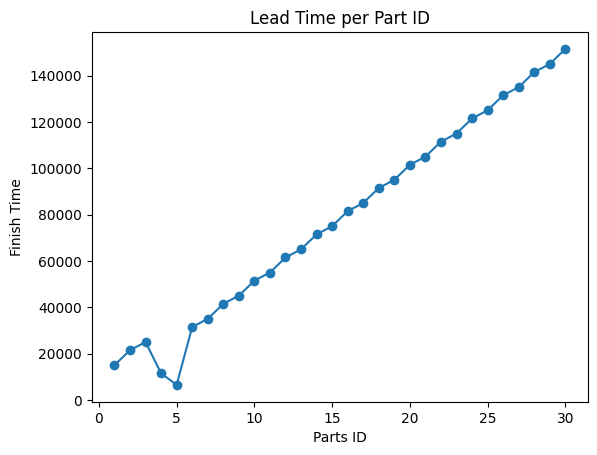

- Maximum Cycle Time: 26500
- Minimum Cycle Time: 6500
>>> Average system cycle time: 23483.333333333332 [time unit]***


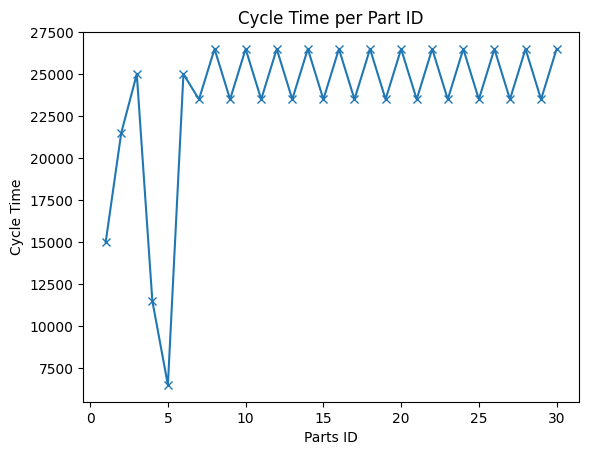

>>> System Throughput: 0.00019801980198019803 [parts / time unit] 


<Figure size 640x480 with 0 Axes>

In [32]:
mydt.run_digital_model(maxparts=30)

In [21]:
mydt.run_sync()

==========  Reading the Model: 5s_deterministic  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Parts stored: Part 4
Part Processes for Trace Driven Simulation: None
Parts stored: Part 5
Part Processes for Trace Driven Simulation: None
Queue Lenght: 5
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 

In [22]:
mydt.generate_digital_model()

==========  Reading the Model: 5s_deterministic  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Queue Lenght: 3
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
--- Part already being processed: Part 4 ---
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2


In [36]:
mydt.run_RCT_services(part_id=5)

============ Running RCT Services ============
### ============ Simulation Started ============ ###
Time: 1097 - [Conveyor towards Queue 2] GOT Part 4
Time: 1097 - [Machine 1] got Part 1 from Queue 1 (capacity= 2)
Time: 1297 - [Conveyor towards Queue 2] PUT Part 4 in the Queue 2
Time: 1298 - [Conveyor towards Queue 4] GOT Part 5
Time: 1298 - [Machine 2] got Part 4 from Queue 2 (capacity= 0)
Time: 1398 - [Conveyor towards Queue 4] PUT Part 5 in the Queue 4
Time: 1399 - [Machine 4] got Part 5 from Queue 4 (capacity= 0)
Time: 4399 - [Conveyor towards Queue 5] GOT Part 5
Time: 4499 - [Conveyor towards Queue 5] PUT Part 5 in the Queue 5
Time: 4500 - [Machine 5] got Part 5 from Queue 5 (capacity= 0)
Time: 6097 - [Conveyor towards Queue 3] GOT Part 1
Time: 6097 - [Machine 1] got Part 2 from Queue 1 (capacity= 1)
Time: 6297 - [Conveyor towards Queue 3] PUT Part 1 in the Queue 3
Time: 6298 - [Conveyor towards Queue 4] GOT Part 4
Time: 6298 - [Machine 3] got Part 1 from Queue 3 (capacity= 0)
Tim

Running for a batch 

In [37]:
mydt.run_RCT_services(batch=3)

============ Running RCT Services ============
### ============ Simulation Started ============ ###
Time: 1097 - [Conveyor towards Queue 2] GOT Part 4
Time: 1097 - [Machine 1] got Part 1 from Queue 1 (capacity= 2)
Time: 1297 - [Conveyor towards Queue 2] PUT Part 4 in the Queue 2
Time: 1298 - [Conveyor towards Queue 4] GOT Part 5
Time: 1298 - [Machine 2] got Part 4 from Queue 2 (capacity= 0)
Time: 1398 - [Conveyor towards Queue 4] PUT Part 5 in the Queue 4
Time: 1399 - [Machine 4] got Part 5 from Queue 4 (capacity= 0)
Time: 4399 - [Conveyor towards Queue 5] GOT Part 5
Time: 4499 - [Conveyor towards Queue 5] PUT Part 5 in the Queue 5
Time: 4500 - [Machine 5] got Part 5 from Queue 5 (capacity= 0)
Time: 6097 - [Conveyor towards Queue 3] GOT Part 1
Time: 6097 - [Machine 1] got Part 2 from Queue 1 (capacity= 1)
Time: 6297 - [Conveyor towards Queue 3] PUT Part 1 in the Queue 3
Time: 6298 - [Conveyor towards Queue 4] GOT Part 4
Time: 6298 - [Machine 3] got Part 1 from Queue 3 (capacity= 0)
Tim

In [38]:
mydt.generate_digital_model()

==========  Reading the Model: 5s_deterministic  ==========
===> Big Picture
Total number of Machines: 5
Total number of Queues: 5

===>Detailed view of Queues:
----------------
Queue 1
Arc links: [5, 1]
Capacity: 10
Parts stored: Part 1
Part Processes for Trace Driven Simulation: None
Parts stored: Part 2
Part Processes for Trace Driven Simulation: None
Parts stored: Part 3
Part Processes for Trace Driven Simulation: None
Queue Lenght: 3
----------------
Queue 2
Arc links: [1, 2]
Capacity: 10
Queue Lenght: 0
----------------
Queue 3
Arc links: [1, 3]
Capacity: 10
Queue Lenght: 0
----------------
Queue 4
Arc links: None
Capacity: 20
Queue Lenght: 0
----------------
Queue 5
Arc links: [4, 5]
Capacity: 10
Queue Lenght: 0

===>Detailed view of Machines:
----------------
> Machine 1
--Queue In:--
Queue 1
--Queue Out:--
Queue 2
Queue 3
Machine Cluster: 1
--- Part already being processed: Part 4 ---
----------------
> Machine 2
--Queue In:--
Queue 2
--Queue Out:--
Queue 4
Machine Cluster: 2
